In [3]:
import pandas as pd
%matplotlib inline

# Baby Names in Moers

Moers is a small city close to netherlands boarder and it got a little bit famous for beeing very open data friendly. So we take our first data to wrangle from there. 

- **Download the data**
    - go to offenesdatenportal.de
    - search for 'vornamen'
    - in the top left filter for 'moers'
    - Download the baby name files for 2015 and 2016 
    - save them to the folder where you started  ```jupyter notebook```

* 2015: [https://www.offenesdatenportal.de/dataset/a7056a8a-ea10-41fd-afb2-62d022aec517/resource/561ba1f8-0575-4a50-957b-3a0f3a070284/download/vornamen2015.csv]
* 2016: [https://www.offenesdatenportal.de/dataset/de4fa198-c122-4524-91db-561e4475ec12/resource/5c39f41f-4610-4f37-ab35-ec60747c94ad/download/vornamen-2016.csv]

## Make a pandas data frame from csv
Let's look at the csv-files: 

In [7]:
# make a data frame from csv 
df15 = pd.read_csv('data/vornamen2015.csv')

In [51]:
# If the data frame is quite large, it can take a while to print the whole thing out. 
# If you use 'df.head()' you will get only the top five rows 
df15.head()

anzahl;vorname;geschlecht
0               48;Sophie;w
1                46;Marie;w
2                  29;Mia;w
3                24;Elias;m
4            22;Charlotte;w

Whoops, what happened? 
In this case our csv is not comma separated. Instead the csv uses a semicolon as seperator: ;. 
Don't worry, you can specify the separator manually: 'sep=';'. 

In [8]:
df15 = pd.read_csv('data/vornamen2015.csv', sep=';')
df15.head()

anzahl    vorname geschlecht
0      48     Sophie          w
1      46      Marie          w
2      29        Mia          w
3      24      Elias          m
4      22  Charlotte          w

In [53]:
# 'df.tail()' gives you the last five rows
df15.tail()

anzahl    vorname geschlecht
1283       1  Zineddine          m
1284       1     Zübeyr          m
1285       1    Étienne          m
1286       1      Şeran          m
1287       1    Şeyhmus          m

As you can see special characters are shown correctly. This is because pandas uses the encoding 'utf-8' as a standard and the data is using this encoding, too. 
If your not that lucky and your special characters start to look weird, you have to find out which encoding was used in the data file. Sometimes the data yource is nice and tells you what encoding they used, ift not you have to find out by trial and error. 
You can specify which encoding pandas uses by adding for example 'encoding='latin-1' or 'encoding='iso- 5589-1'.

In [54]:
df15 = pd.read_csv('data/vornamen2015.csv', sep=';', encoding='utf-8')
df15[15:20]

anzahl  vorname geschlecht
15      15     Mats          m
16      15  Johanna          w
17      14    Felix          m
18      14     Luis          m
19      14   Emilia          w

## You do it 
- Read vornamen2016.csv into a pandas data frame 
- look at head and tail of your data 

In [4]:
df16 = pd.read_csv('data/vornamen-2016.csv', sep=';')

## Filtering

In [57]:
# Top names > filter by 'anzahl'
df15top = df15[df15['anzahl'] > 17]
df15top

anzahl    vorname geschlecht
0       48     Sophie          w
1       46      Marie          w
2       29        Mia          w
3       24      Elias          m
4       22  Charlotte          w
5       21        Ben          m
6       20  Alexander          m
7       19       Paul          m
8       19       Lina          w
9       18      Jonas          m
10      18     Amelie          w
11      18       Emma          w
12      18     Sophia          w

In [58]:
# Only girls 
df15topgirls = df15top[df15top['geschlecht'] == 'w']
df15topgirls

anzahl    vorname geschlecht
0       48     Sophie          w
1       46      Marie          w
2       29        Mia          w
4       22  Charlotte          w
8       19       Lina          w
10      18     Amelie          w
11      18       Emma          w
12      18     Sophia          w

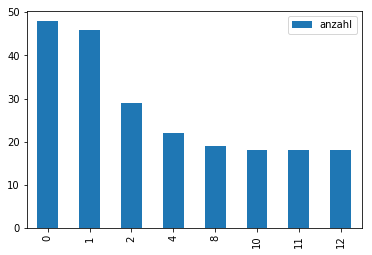

In [59]:
df15topgirls.plot(kind='bar')

In [60]:
df15topgirls = df15topgirls.set_index('vorname')
df15topgirls 

anzahl geschlecht
vorname                     
Sophie         48          w
Marie          46          w
Mia            29          w
Charlotte      22          w
Lina           19          w
Amelie         18          w
Emma           18          w
Sophia         18          w

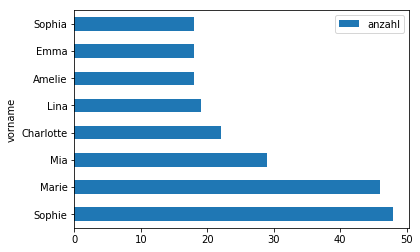

In [61]:
df15topgirls.plot(kind='barh')

In [62]:
df15topgirls = df15topgirls.sort_values('anzahl', ascending=True)

In [63]:
df15topgirls

anzahl geschlecht
vorname                     
Amelie         18          w
Emma           18          w
Sophia         18          w
Lina           19          w
Charlotte      22          w
Mia            29          w
Marie          46          w
Sophie         48          w

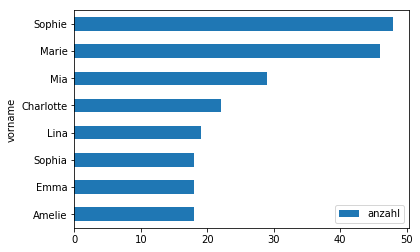

In [64]:
df15topgirls.plot.barh()

  ## You do it 

- Filter df16 to only boys names that were given more than 20 times 
- Plot the top16boys as a horizontal bar chart in descending order

In [ ]:
df16boys = 

# Combine two dfs into one 

If we want to combine the two data files, it can be handy to add a new colum 'jahr' to each of them first.
And it will be usefull later to have a column for the ranking of a name. As the names already are in descending order from the top to the uncommon names, we can use the index + 1, because we like to start to count from 1. 

In [67]:
df_concat15 = df15[:]
df_concat15['jahr'] = '2015' 
df_concat15['rang'] = df_concat15.index+1
df_concat15.head()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


anzahl    vorname geschlecht  jahr  rang
0      48     Sophie          w  2015     1
1      46      Marie          w  2015     2
2      29        Mia          w  2015     3
3      24      Elias          m  2015     4
4      22  Charlotte          w  2015     5

## You do it 
Make the column 'jahr' for 2016 and make the columns 'rang'.

In [ ]:
df_concat16 = df16[:]




### First way: Concat 
There are a lot of possibilities to combine two dataframes. You can merge and join them based on parameters you can define. First we will use the most simple way and just glue the two dataframes together, one under the other. 
To be able to prove that all went well, we look at the dimensions of the data frames first. 

In [70]:
# df.shape shows you how many rows and columns are in your data frame. 
df_concat15.shape

(1288, 5)

## You do it 
Show how many rows and columns are in df16

## Concat the two data frames

In [80]:
# make a list of our two data frames 
dfs = [df_concat15, df_concat16]

# concat them 
names = pd.concat(dfs)

In [81]:
names.shape 

(2664, 5)

## You do it 
Use a jupyter notebook cell as a calculator to prove that all rows and columns that you expect are in your new names df 

## More baby names fun

In [ ]:
name = input('Please insert your name: ')
Mein_Name = names[(names['vorname'] == name)]
Mein_Name

In [82]:
top_namen = names[names['rang'] <3]

In [83]:
top_namen

anzahl vorname geschlecht  jahr  rang
0      48  Sophie          w  2015     1
1      46   Marie          w  2015     2
0      47  Sophie          w  2016     1
1      45   Marie          w  2016     2

In [84]:
namen1 = top_namen.pivot_table(values='anzahl', index='jahr', columns='vorname', aggfunc=sum)
namen1

vorname  Marie  Sophie
jahr                  
2015        46      48
2016        45      47

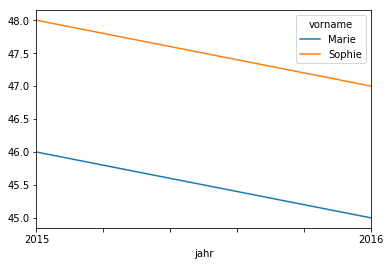

In [85]:
namen1.plot()

# What was the most popular name 2015 and 2016? 

In [86]:
# Now our names data frame starts with the most used names in 2015 and ends with the uncommon names from 2016.
names.head()

anzahl    vorname geschlecht  jahr  rang
0      48     Sophie          w  2015     1
1      46      Marie          w  2015     2
2      29        Mia          w  2015     3
3      24      Elias          m  2015     4
4      22  Charlotte          w  2015     5

If you want to know what was the most popular name in 2015 and 2016, you try to sort by value 'anzahl' ...  

In [87]:
names.sort_values('anzahl', ascending=False).head(10)

anzahl    vorname geschlecht  jahr  rang
0      48     Sophie          w  2015     1
0      47     Sophie          w  2016     1
1      46      Marie          w  2015     2
1      45      Marie          w  2016     2
2      29        Mia          w  2015     3
2      25        Ben          m  2016     3
3      25       Leon          m  2016     4
3      24      Elias          m  2015     4
4      24        Mia          w  2016     5
4      22  Charlotte          w  2015     5

## Merging data frames 
In this case it would be better two have two columns: one for 'anzahl_2015' and one for 'anzahl_2016'. Then jou can add both.  
Maybe it's a better option to merge the two dfs instead of concatenating them. 

In [18]:
df15.head()

anzahl    vorname geschlecht
0      48     Sophie          w
1      46      Marie          w
2      29        Mia          w
3      24      Elias          m
4      22  Charlotte          w

In [19]:
names_combined = pd.merge(df16, df15, how='left', on=['vorname', 'geschlecht'])

In [20]:
names_combined.head()

anzahl_x vorname geschlecht  anzahl_y
0        47  Sophie          w      48.0
1        45   Marie          w      46.0
2        25     Ben          m      21.0
3        25    Leon          m      17.0
4        24     Mia          w      29.0

In [21]:
names_combined['anzahl'] = names_combined['anzahl_x'] + names_combined['anzahl_y']

In [22]:
names_combined.sort_values('anzahl', ascending=False).head(10)

anzahl_x    vorname geschlecht  anzahl_y  anzahl
0         47     Sophie          w      48.0    95.0
1         45      Marie          w      46.0    91.0
4         24        Mia          w      29.0    53.0
2         25        Ben          m      21.0    46.0
8         20      Elias          m      24.0    44.0
3         25       Leon          m      17.0    42.0
10        19      Jonas          m      18.0    37.0
12        18       Paul          m      19.0    37.0
16        16  Alexander          m      20.0    36.0
22        14  Charlotte          w      22.0    36.0

In [23]:
names_top = names_combined[['vorname', 'geschlecht', 'anzahl']]

In [24]:
names_top = names_top.head(10)
names_top = names_top.sort_values('anzahl')

In [25]:
names_top = names_top.set_index('vorname')

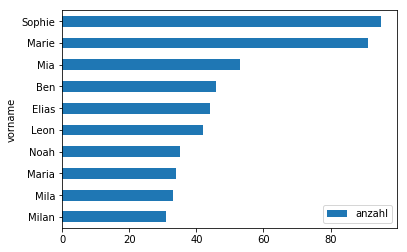

In [26]:
names_top.plot.barh()

## YES! 